In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#files on disk
scores_file = 'full_dataset.csv'
pos_neg_words_file = 'pos_neg_counts.csv'
time_file = 'transcript_times.csv'

#load files
scores = pd.read_csv(scores_file, index_col=0)
y = scores['PHQ8_Binary'].values
y2 = scores['PHQ8_Score'].values

pos_neg = pd.read_csv(pos_neg_words_file, index_col=0)

In [3]:
print(scores.columns)
print(pos_neg.columns)

Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender'], dtype='object')
Index(['part_num', 'num_pos', 'num_neg', 'pos_freq', 'neg_freq'], dtype='object')


In [4]:
#drop identifying column, add scores
pos_neg.drop('part_num', axis=1, inplace=True)
pos_neg['binary'] = y
pos_neg['scores'] = y2

In [5]:
pos_neg.head()

,num_pos,num_neg,pos_freq,neg_freq,binary,scores
0,7,4,18,4,0,2
1,17,12,64,16,0,3
2,13,3,17,3,0,4
3,21,13,81,19,0,0
4,11,6,28,8,0,6


### EDA

In [7]:
#correlation matrix
corr = pos_neg.corr()
corr.head(6)

,num_pos,num_neg,pos_freq,neg_freq,binary,scores
num_pos,1.000000,0.614782,0.631815,0.579145,-0.051438,-0.106015
num_neg,0.614782,1.000000,0.605851,0.921002,0.078568,0.088344
pos_freq,0.631815,0.605851,1.000000,0.645542,-0.029350,-0.103948
neg_freq,0.579145,0.921002,0.645542,1.000000,0.055281,0.084897
binary,-0.051438,0.078568,-0.029350,0.055281,1.000000,0.841770
scores,-0.106015,0.088344,-0.103948,0.084897,0.841770,1.000000


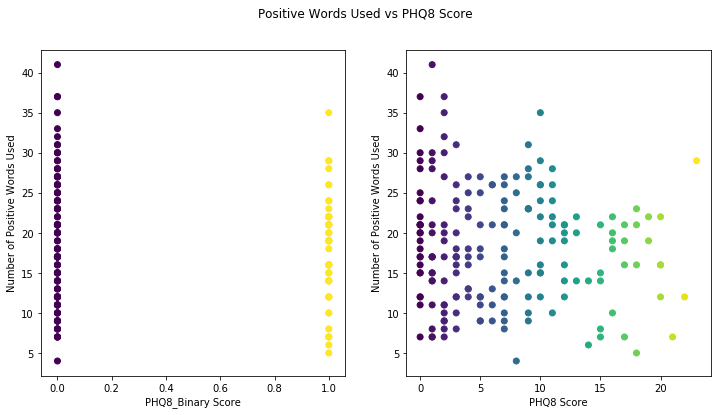

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(pos_neg.binary, pos_neg.num_pos, c=pos_neg.binary)
ax[0].set_xlabel('PHQ8_Binary Score')
ax[0].set_ylabel('Number of Positive Words Used')

ax[1].scatter(pos_neg.scores, pos_neg.num_pos, c=pos_neg.scores)
ax[1].set_xlabel('PHQ8 Score')
ax[1].set_ylabel('Number of Positive Words Used')

plt.suptitle('Positive Words Used vs PHQ8 Score')
plt.show()

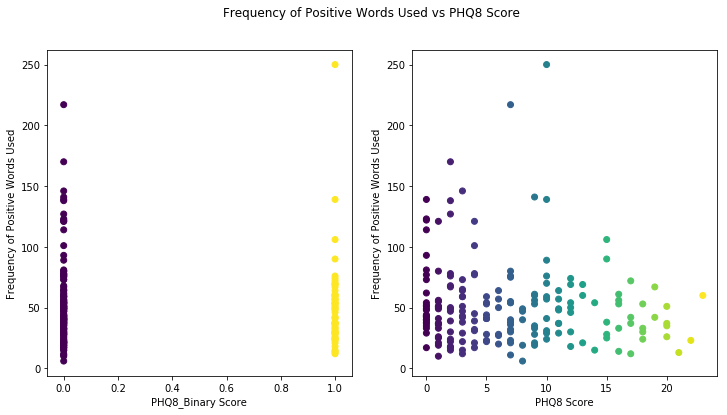

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(pos_neg.binary, pos_neg.pos_freq, c=pos_neg.binary)
ax[0].set_xlabel('PHQ8_Binary Score')
ax[0].set_ylabel('Frequency of Positive Words Used')

ax[1].scatter(pos_neg.scores, pos_neg.pos_freq, c=pos_neg.scores)
ax[1].set_xlabel('PHQ8 Score')
ax[1].set_ylabel('Frequency of Positive Words Used')

plt.suptitle('Frequency of Positive Words Used vs PHQ8 Score')
plt.show()

These word counts are show no clear indication of a correlation with PHQ8 socres. The highest correlation so far is still the number of first person personal pronouns against total words used. The DAIC-WOZ data set seems ill-suited for sentiment analysis.